In [1]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL

In [2]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [3]:
jasper.service().rdf_table().head()

,Subject,Predicate,Object
0,b4,http://w3id.org/rsp/vocals-sd#body_param,b15
1,b13,http://w3id.org/rsp/vocals-sd#name,format
2,b2,http://w3id.org/rsp/vocals-sd#endpoint,/streams/:stream
3,b5,http://w3id.org/rsp/vocals#feature,http://localhost:8181//StreamsGetterFeature
4,b3,http://w3id.org/rsp/vocals#feature,http://localhost:8181//StreamDeletionFeature


In [4]:
jasper.streams()

In [5]:
jasper.tasks()

In [6]:
redstream = Stream("http://redstream:1255/red")

In [7]:
redstream.endpoints()[0].call().rdf_table()

Single Connection to WebSocket.


,Subject,Predicate,Object
0,file:///home/jovyan/work/solutions/7a7927f4-7d...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.streamreasoning.org/ontologies/2018...


In [48]:
qid  = "redcount"
tbox = "https://raw.githubusercontent.com/riccardotommasini/colorwave/master/colors.owl"
frmt = "JSON"
body ="""
        SELECT (COUNT(?r) as ?numRed)
        FROM NAMED WINDOW <rw> ON <http://redstream:1255/red> [RANGE PT15S STEP PT5S]
        WHERE {
                WINDOW ?rw { ?r a <http://www.streamreasoning.org/ontologies/2018/9/colors#Red> .}
            }
      """

In [49]:
jasper.create(qid, body, tbox, frmt)

In [50]:
r = jasper.expose(qid, 'HTTP', retention=5).rdf()

In [59]:
r = jasper.observers(qid).endpoints()[0]


In [61]:
resp = r.call()

In [68]:
df = resp.flatten().dataframe(['results_bindings_0_numRed_value'])

In [69]:
df

,head_vars_0,results_bindings_0_numGreen_datatype,results_bindings_0_numGreen_type,results_bindings_0_numGreen_value
0,numGreen,http://www.w3.org/2001/XMLSchema#integer,literal,2
1,numGreen,http://www.w3.org/2001/XMLSchema#integer,literal,2
2,numGreen,http://www.w3.org/2001/XMLSchema#integer,literal,3
3,numGreen,http://www.w3.org/2001/XMLSchema#integer,literal,4
4,numGreen,http://www.w3.org/2001/XMLSchema#integer,literal,4


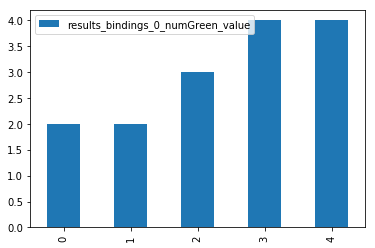

In [70]:
% matplotlib inline
df.plot(kind='bar')

In [71]:
jasper.delete(qid)